Import Modules

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load The Historical Dataset

In [11]:
# Convert csv into dataframe
df = pd.read_csv('Converted_Energy_Consumption.csv')
print(df.to_string())

      Id  Year  Fuel_Type_Id  Consumption         Units
0      1  1950             1      5974.61  Trillion BTU
1      2  1955             1      9006.98  Trillion BTU
2      3  1960             1     12397.81  Trillion BTU
3      4  1965             1     15830.08  Trillion BTU
4      5  1970             1     21900.00  Trillion BTU
5      6  1975             1     20241.37  Trillion BTU
6      7  1980             1     20592.57  Trillion BTU
7      8  1985             1     17903.12  Trillion BTU
8      9  1990             1     19864.26  Trillion BTU
9     10  1995             1     23006.45  Trillion BTU
10    11  2000             1     24172.99  Trillion BTU
11    12  2005             1     22806.50  Trillion BTU
12    13  2010             1     24954.13  Trillion BTU
13    14  2011             1     25358.17  Trillion BTU
14    15  2012             1     26457.37  Trillion BTU
15    16  2013             1     27096.58  Trillion BTU
16    17  2014             1     27550.35  Trill

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error (MAE): 6302.90
Mean Squared Error (MSE): 136584005.06
Root Mean Squared Error (RMSE): 11686.92
R-squared (R2): -0.23


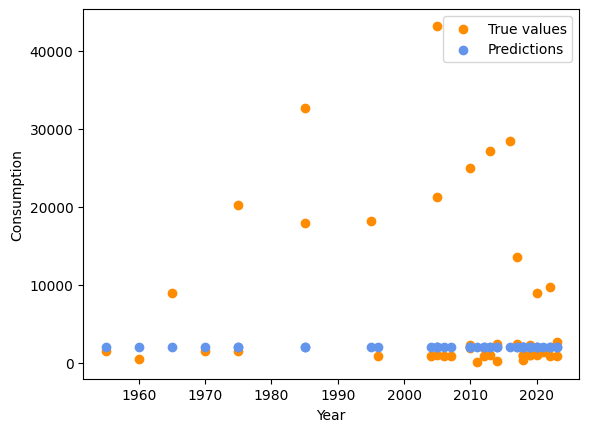

In [17]:
# Preprocess features
X = df[['Year', 'Fuel_Type_Id']]
y = df[['Consumption']]

# Encode categorial feature (Fuel_Type_id) & scale the numerical feature (Year)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Year']),
        ('cat', OneHotEncoder(), ['Fuel_Type_Id'])
    ]
)

# Define the models pipeline
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', SVR(kernel='rbf'))
    ]
)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Evaluate the model
plt.scatter(X_test['Year'], y_test, color='darkorange', label='True values')
plt.scatter(X_test['Year'], y_pred, color='cornflowerblue', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend()
plt.show()

